# OZNAL - Vplyv pandémie na využitie Free Wifi v BA

## Autori: Norbert Varga, Krištof Zubricky

In [1]:
#kniznice
#install.packages("tidyverse")
library(tidyverse) 
library(reshape2)
library(ggplot2)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [2]:
#Pocty prenesenych dat:

#set the working directory from which the files will be read from
setwd("data/poctyPrenesenychDat/")

#create a list of the files from your target directory
file_list <- list.files(pattern="*.csv") #musel som pridat nuly pred cisla v nazvoch lebo inak bralo 1,10,11,...

#initiate a blank data frame, each iteration of the loop will append the data from the given file to this variable
dataset_poctyPrenesenychDat <- data.frame()

for (i in 1:length(file_list)){
  temp_data <- read.csv(file = file_list[i], sep=",", encoding="UTF-8") 
  dataset_poctyPrenesenychDat <- rbind(dataset_poctyPrenesenychDat, temp_data) #for each iteration, bind the new data to the building dataset
}

#Data su od 24.5.2018 do 29.2.2020. Prvy problem je, ze v podstate nemame udaje pre obdobie pocas korony,
#druhy problem je, ze v niektore dni je viac merani. Treba to spojit v ramci jednotlivych dni. Navrhujem
#predkoronove udaje neskor vygenerovat

#write.csv2(dataset, "../../dataset.csv")

setwd("../..")

#column names na lowercase
names(dataset_poctyPrenesenychDat) <- tolower(names(dataset_poctyPrenesenychDat))
#show(dataset_poctyPrenesenychDat)


In [3]:
#Udaje o pouzivateloch + dlzka pripojenia:

setwd("data/udajeDlzkaPripojenia/")

file_list <- list.files(pattern="*.csv") 

dataset_udajeDlzkaPripojenia <- data.frame()

for (i in 1:length(file_list)){
  temp_data <- read.csv(file = file_list[i], sep=";", encoding="UTF-8") 
  dataset_udajeDlzkaPripojenia <- rbind(dataset_udajeDlzkaPripojenia, temp_data) 
}
#Data su od 1.6.2018 do 25.2.2021. Problemy som nezaznamenal ziadne. Toto bude fajn zaklad pre nas dataset.

#write.csv2(dataset, "../../dataset.csv")

setwd("../..")

#column names na lowercase
names(dataset_udajeDlzkaPripojenia) <- tolower(names(dataset_udajeDlzkaPripojenia))
#show(dataset_udajeDlzkaPripojenia)



In [4]:
#Udaje o zariadeni - Jazyk, OS, Typ zariadenia, Typ prehliadaca:

setwd("data/osJazykTypPrehliadac/")

file_list <- list.files(pattern="*.csv") 

dataset_osJazykTypPrehliadac <- data.frame()

for (i in 1:length(file_list)){
  temp_data <- read.csv(file = file_list[i], sep=";", encoding="UTF-8") 
  dataset_osJazykTypPrehliadac <- rbind(dataset_osJazykTypPrehliadac, temp_data) 
}

#column names na uppercase
names(dataset_osJazykTypPrehliadac) <- tolower(names(dataset_osJazykTypPrehliadac))


#Data su od 24.5.2018 do 25.2.2021. Velmi pekne data, ktore urcite chceme pouzit. Problem je ich forma.
#Je tam variabilny pocet zaznamov pre kazdy den, podla mnozstva identifikovanych jazykov atd v dany den.
#Treba to previest na stlpce a tiez asi zvazit ktore hodnoty nam stoji za to pouzit v datasete a ktore nie. 

#write.csv2(dataset, "../../dataset.csv")
#show(dataset_osJazykTypPrehliadac)
setwd("../..")

In [5]:
#Pocty podla oblasti:

setwd("data/poctyPodlaOblasti/")

file_list <- list.files(pattern="*.csv")

dataset_poctyPodlaOblasti <- data.frame()

for (i in 1:length(file_list)){
  temp_data <- read.csv(file = file_list[i], sep=";", encoding="UTF-8", stringsAsFactors=FALSE) 
  dataset_poctyPodlaOblasti <- rbind(dataset_poctyPodlaOblasti, temp_data) 
}

#Vo vysledom dataframe su najprv udaje po celych mesiacoch a lokality su menej podelene. 
#Nasledne od 1.10.2019 su data po dnoch a "ostatne" je rozdelene na konkretne lokality. Navrhujem teda zatial
#napojit len od 1.10.2019 a pred tymto datumom to neskor podelime na dni tak aby bolo rozdelenie priblizne rovnake 

#column names na uppercase
names(dataset_poctyPodlaOblasti) <- tolower(names(dataset_poctyPodlaOblasti))


#write.csv2(dataset, "../../dataset.csv")
#show(dataset_poctyPodlaOblasti)
setwd("../..")

In [6]:
#spoji stplpce "type" a "name" => type_name
#type: browser, name: Firefox, value: 5 => type_name: browser_Firefox, value:5
type_and_name <- unite(dataset_osJazykTypPrehliadac, type_name, c(type, name), remove=TRUE)

# prekonvertuje riadok na stlpec, unique ID je date pri dataset_osJazykTypPrehliadac
# type_name: browser_Firefox, value:5 => browser_Firefox: 5 pre dany den
dataset_type_and_name <- dcast(type_and_name, date ~ type_name, value.var = "value")

# prekonvertuje riadok na stlpec, unique ID je date pri poctyPodlaOblasti
dataset_location <- dcast(dataset_poctyPodlaOblasti, date ~ location, value.var = "value")

In [7]:
#konvertujeme na Date format aby sme mohli nasledne filtrovat
dataset_location$date <- as.Date(dataset_location$date, format="%Y-%m-%d %H:%M:%OS")

#chceme data po 2019-10-01 kedze predtym data boli za cely mesiac 
dataset_filtered_location <- subset(dataset_location, date > "2019-10-01")


In [8]:
#merge datasets na zaklade date (poctyPrenesenychDat + udajeDlzkaPripojenia)
merged_dataset_1 <- merge(dataset_poctyPrenesenychDat, dataset_udajeDlzkaPripojenia, by="date", all=TRUE)

#merge datasets na zaklade date (poctyPrenesenychDat + udajeDlzkaPripojenia + osJazykTypPrehliadac)
merged_dataset_2 <- merge(merged_dataset_1, dataset_type_and_name, by="date", all=TRUE)

#merge datasets na zaklade date (poctyPrenesenychDat + udajeDlzkaPripojenia + osJazykTypPrehliadac + poctyPodlaOblasti)
final_merged_dataset <- merge(dataset_filtered_location, merged_dataset_2, by="date", all=TRUE)

#write.csv2(final_merged_dataset, "../../dataset_final.csv")
head(final_merged_dataset)



date,CTUR,FJNN (oblasť Fajnorovho Nábrežia pred SPŠS),"HLVN (oblasť Hlavného Námestia, Františkánskeho Námestia a Starej Radnice)",HURN (oblasť Hurbanovho námestia),HVZN (oblasť Hviezdoslavovho Námestia v okolí ambasády USA),KLOB (oblasť Klobučníckej a Námestia SNP pred Starou Tržnicou),KNPM (oblasť Jedlíkovej ulice),KOLN (oblasť spodnej časti Kollárovho námestia),NLST (oblasť Námestia Ľudovíta Štúra),...,lang_vi,lang_zh,os_\N,os_Android,os_iOS,os_Linux,os_Nan,os_OS X,os_others,os_Windows
2018-05-24,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,2,NA,246,193,NA,1,1,3,6
2018-05-25,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,777,479,NA,NA,NA,NA,5
2018-05-26,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,706,804,NA,NA,2,NA,NA
2018-05-27,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,2,NA,NA,828,845,NA,NA,NA,NA,6
2018-05-28,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,2,NA,490,490,NA,NA,2,NA,NA
2018-05-29,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,910,385,NA,NA,NA,NA,NA


In [9]:
#remove repeating dates

unique_dates_dataset = data.frame()

prev_row = final_merged_dataset[1,]

for(i in 2:nrow(final_merged_dataset)) 
{
    row <- final_merged_dataset[i,]
    if(row['date'] == prev_row['date'])
    {
        prev_row['data_in'] = prev_row['data_in'] + row['data_in']
        prev_row['data_out'] = prev_row['data_out'] + row['data_out']
        prev_row['unique_conn'] = prev_row['unique_conn'] + row['unique_conn']
    }
    else    
    {            
        unique_dates_dataset = rbind(unique_dates_dataset, prev_row)
            
        prev_row = row
        if(is.na(prev_row['data_in']))
            prev_row['data_in'] = 0
        if(is.na(prev_row['data_out']))
            prev_row['data_out'] = 0
        if(is.na(prev_row['unique_conn']))
            prev_row['unique_conn'] = 0        
    }
}

unique_dates_dataset = rbind(unique_dates_dataset, prev_row)

In [10]:
#drop columns containing NAs only
unique_dates_dataset['Ostatné'] <- list(NULL)
unique_dates_dataset['device_type_\\N'] <- list(NULL)
unique_dates_dataset['device_type_'] <- list(NULL)
unique_dates_dataset['lang_\\N'] <- list(NULL)
unique_dates_dataset['os_\\N'] <- list(NULL)
unique_dates_dataset['browser_\\N'] <- list(NULL)
unique_dates_dataset['Test'] <- list(NULL)

In [11]:
#replace NA with 0 where relevant

naToZeroC <- function(x) 
{   
    sapply(x, naToZeroR)
}

naToZeroR <- function(x) 
{
    if(is.na(x))
       x = 0
    x
}

df = cbind(unique_dates_dataset[1:35], lapply(unique_dates_dataset[36:ncol(unique_dates_dataset)], naToZeroC))                                                                 

In [12]:
#zlucenie jazykov

#vyber jazyky
dfa = df[58 :ncol(df)-7]

#odloz mimo jazyky ktore chceme zvlast
dfen = dfa['lang_en']
dfa['lang_en'] <- list(NULL)
dfhu = dfa['lang_hu']
dfa['lang_hu'] <- list(NULL)
dfru = dfa['lang_ru']
dfa['lang_ru'] <- list(NULL)
dfpl = dfa['lang_pl']
dfa['lang_pl'] <- list(NULL)
dfde = dfa['lang_de']
dfa['lang_de'] <- list(NULL)
dfuk = dfa['lang_fr']
dfa['lang_fr'] <- list(NULL)
dfes = dfa['lang_es']
dfa['lang_es'] <- list(NULL)
dfit = dfa['lang_it']
dfa['lang_it'] <- list(NULL)
dfsk = dfa['lang_sk']
dfa['lang_sk'] <- list(NULL)

#urob sucty ostatnych jazykov do jedneho stlpca a pripoj k stlpcom co boli pred jazykmi
dfb = cbind(df[1:57], lang_other = apply(dfa, 1, sum))

#pripoj jazyky co chceme zvlast
dfb = cbind(dfb, dfen)
dfb = cbind(dfb, dfhu)
dfb = cbind(dfb, dfru)
dfb = cbind(dfb, dfpl)
dfb = cbind(dfb, dfde)
dfb = cbind(dfb, dfuk)
dfb = cbind(dfb, dfes)
dfb = cbind(dfb, dfit)
dfb = cbind(dfb, dfsk)

#pripoj stlpce co boli za jazykmi
dfb = cbind(dfb, df[(ncol(df)-6):(ncol(df))])


In [13]:
write.csv2(dfb, "../../dfb.csv")

In [14]:
#reset index
row.names(dfb) <- NULL

In [15]:
#convert Bytes to GB
dfb$data_in_GB <- with(dfb, dfb$data_in / 1073741824)
dfb$data_out_GB <- with(dfb, dfb$data_out / 1073741824)


# Prieskumna analyza

In [16]:
#aby sme videli vsetky stlpce
options(repr.matrix.max.cols=90, repr.matrix.max.rows=10)
dfb

date,CTUR,FJNN (oblasť Fajnorovho Nábrežia pred SPŠS),"HLVN (oblasť Hlavného Námestia, Františkánskeho Námestia a Starej Radnice)",HURN (oblasť Hurbanovho námestia),HVZN (oblasť Hviezdoslavovho Námestia v okolí ambasády USA),KLOB (oblasť Klobučníckej a Námestia SNP pred Starou Tržnicou),KNPM (oblasť Jedlíkovej ulice),KOLN (oblasť spodnej časti Kollárovho námestia),NLST (oblasť Námestia Ľudovíta Štúra),NSLO (oblasť parku Námestia Slobody),NSNP (oblasť Námestia SNP),OBCH ( oblasť Obchodná ulica stred),OSPR (oblasť Osobného prístavu a pred SNM),PAMV (oblasť Pamätníka Víťazstva a pred SND),POST (oblasť križovania ulíc Poštová - Obchodná),RBNN (oblasť Rybného Námestia),RIGL (oblasť Rigeleho a Rázusovho Nábrežia),SAFK (oblasť Šafárikovho Námestia pri UK),Tyršák,VNTU (oblasť križovania ulíc Ventúrska-Michalská-Sedlárska),ZIDO (oblasť Židovskej ulice pri dobrom pastierovi),ZMCK (oblasť rohu Židovskej a Kapucínskej ulice),data_in,data_out,unique_conn,new_users,returning_users,average_online,max_online,dwell_5m,dwell_10m,dwell_30m,dwell_60m,dwell_long,browser_Android,browser_Chrome,browser_Firefox,browser_IE,browser_Nan,browser_Opera,browser_others,browser_Safari,device_type_desktop,device_type_ereader,device_type_gaming,device_type_media,device_type_mobile,device_type_Nan,device_type_tablet,lang_af,lang_ag,lang_ar,lang_az,lang_ba,lang_be,lang_bg,lang_other,lang_en,lang_hu,lang_ru,lang_pl,lang_de,lang_fr,lang_es,lang_it,lang_sk,os_Android,os_iOS,os_Linux,os_Nan,os_OS X,os_others,os_Windows,data_in_GB,data_out_GB
2018-05-24,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2482909612,16402839461,616,NA,NA,NA,NA,NA,NA,NA,NA,NA,7,244,2,0,1,4,1,193,4,0,0,0,397,61,5,0,0,2,0,0,0,0,55,114,1,27,3,12,0,7,5,227,246,193,0,1,1,3,6,2.31239,15.27633
2018-05-25,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,38940049189,117855350107,3563,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,908,0,0,0,0,0,480,0,0,0,0,1071,54,0,0,0,0,0,0,0,0,1,193,0,14,0,0,0,3,0,666,777,479,0,0,0,0,5,36.26575,109.76135
2018-05-26,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,49881955108,166732613033,4818,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,851,3,0,0,0,0,805,3,0,0,0,1952,76,0,0,0,0,0,0,0,0,0,501,0,6,0,15,0,0,0,556,706,804,0,0,2,0,0,46.45619,155.28185
2018-05-27,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,38747672250,124623629172,4077,NA,NA,NA,NA,NA,NA,NA,NA,NA,5,807,0,1,0,0,0,845,0,0,0,0,2040,56,0,0,0,0,0,0,0,0,8,371,7,0,0,15,0,12,0,522,828,845,0,0,0,0,6,36.08658,116.06480
2018-05-28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,37839584968,149291182187,4120,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,485,3,0,0,0,0,490,4,0,0,0,1233,0,7,0,0,0,0,0,0,0,2,211,0,0,0,16,0,0,0,388,490,490,0,0,2,0,0,35.24086,139.03825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,0,0,1,4,1,2,0,0,0,1,0,1,0,3,2,2,1,0,NA,0,0,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA
2021-02-22,0,1,3,4,1,6,0,4,3,2,1,4,1,2,1,3,1,0,NA,0,1,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA
2021-02-23,0,1,4,1,1,11,0,4,4,1,2,0,0,3,1,2,1,4,NA,0,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA
2021-02-24,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,60,482,128,198,2111,442,332,72,40,2,17,2,0,0,0,1,24,2,0,0,0,41,3,0,0,0,0,0,0,0,0,4,8,2,4,0,0,1,2,0,25,19,24,0,0,2,0,1,0,0


In [17]:
summary(dfb)

      date                 CTUR       
 Min.   :2018-05-24   Min.   :0.0000  
 1st Qu.:2019-01-28   1st Qu.:0.0000  
 Median :2019-10-05   Median :0.0000  
 Mean   :2019-10-06   Mean   :0.4225  
 3rd Qu.:2020-06-11   3rd Qu.:1.0000  
 Max.   :2021-02-25   Max.   :4.0000  
                      NA's   :812     
 FJNN (oblast Fajnorovho Nábrežia pred SPŠS)
 Min.   : 0.000                             
 1st Qu.: 1.000                             
 Median : 2.000                             
 Mean   : 4.621                             
 3rd Qu.: 6.000                             
 Max.   :44.000                             
 NA's   :498                                
 HLVN (oblast Hlavného Námestia, Františkánskeho Námestia a Starej Radnice)
 Min.   :  0.0                                                             
 1st Qu.:  3.0                                                             
 Median : 13.0                                                             
 Mean   : 24.7          

Pocet riadkov

In [18]:
nrow(dfb)

[1] 999

Pocet stlpcov

In [19]:
ncol(dfb)

[1] 76

In [20]:
colnames(dfb)

[1] "date"                                                                      
 [2] "CTUR"                                                                      
 [3] "FJNN (oblast Fajnorovho Nábrežia pred SPŠS)"                               
 [4] "HLVN (oblast Hlavného Námestia, Františkánskeho Námestia a Starej Radnice)"
 [5] "HURN (oblast Hurbanovho námestia)"                                         
 [6] "HVZN (oblast Hviezdoslavovho Námestia v okolí ambasády USA)"               
 [7] "KLOB (oblast Klobucníckej a Námestia SNP pred Starou Tržnicou)"            
 [8] "KNPM (oblast Jedlíkovej ulice)"                                            
 [9] "KOLN (oblast spodnej casti Kollárovho námestia)"                           
[10] "NLST (oblast Námestia Ludovíta Štúra)"                                     
[11] "NSLO (oblast parku Námestia Slobody)"                                      
[12] "NSNP (oblast Námestia SNP)"                                                
[13] "OBCH ( oblast Obchodná ulica stred)"                                       
[14] "OSPR (oblast  Osobného prístavu a pred SNM)"                               
[15] "PAMV (oblast Pamätníka Vítazstva a pred SND)"                              
[16] "POST (oblast križovania ulíc Poštová - Obchodná)"                          
[17] "RBNN (oblast Rybného Námestia)"                                            
[18] "RIGL (oblast Rigeleho a Rázusovho Nábrežia)"                               
[19] "SAFK (oblast Šafárikovho Námestia pri UK)"                                 
[20] "Tyršák"                                                                    
[21] "VNTU (oblast križovania ulíc Ventúrska-Michalská-Sedlárska)"               
[22] "ZIDO (oblast Židovskej ulice pri dobrom pastierovi)"                       
[23] "ZMCK (oblast rohu Židovskej a Kapucínskej ulice)"                          
[24] "data_in"                                                                   
[25] "data_out"                                                                  
[26] "unique_conn"                                                               
[27] "new_users"                                                                 
[28] "returning_users"                                                           
[29] "average_online"                                                            
[30] "max_online"                                                                
[31] "dwell_5m"                                                                  
[32] "dwell_10m"                                                                 
[33] "dwell_30m"                                                                 
[34] "dwell_60m"                                                                 
[35] "dwell_long"                                                                
[36] "browser_Android"                                                           
[37] "browser_Chrome"                                                            
[38] "browser_Firefox"                                                           
[39] "browser_IE"                                                                
[40] "browser_Nan"                                                               
[41] "browser_Opera"                                                             
[42] "browser_others"                                                            
[43] "browser_Safari"                                                            
[44] "device_type_desktop"                                                       
[45] "device_type_ereader"                                                       
[46] "device_type_gaming"                                                        
[47] "device_type_media"                                                         
[48] "device_type_mobile"                                                        
[49] "device_type_Nan"                                           

Najviac ludi online 

In [21]:
dfb[which.max(dfb$max_online), c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,device_type_mobile,lang_sk
423,2019-07-20,1842,983,275,48426085433,189023678733,753,1042


Najmenej ludi online 

In [22]:
#chyba v datach, orig. je tam 0
dfb[which.min(dfb$max_online), c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,device_type_mobile,lang_sk
161,2018-10-31,0,480,0,20145444084,125947383393,1001,500


Najviac novych pouzivatelov

In [23]:
dfb[which.max(dfb$new_users), c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,device_type_mobile,lang_sk
86,2018-08-17,935,1348,243,53316794469,188178285459,2765,600


Najmenej novych pouzivatelov

In [24]:
dfb[which.min(dfb$new_users), c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,device_type_mobile,lang_sk
403,2019-06-30,308,37,21,2841971994,15480679273,48,105


Najviac prenesenych dat (in)

In [25]:
dfb[which.max(dfb$data_in), c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'data_in_GB', 'data_out_GB', 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,data_in_GB,data_out_GB,device_type_mobile,lang_sk
515,2019-10-20,NA,NA,NA,83841637760,380738334062,78.08361,354.5902,0,0


Najmenej prenesenych dat (in)

In [26]:
#nemame data_in a data_out 
dfb[which.min(dfb$data_in),  c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'data_in_GB', 'data_out_GB', 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,data_in_GB,data_out_GB,device_type_mobile,lang_sk
998,2021-02-24,198,60,128,0,0,0,0,41,25


Najviac prenesenych dat (out)

In [27]:
dfb[which.max(dfb$data_out),  c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'data_in_GB', 'data_out_GB', 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,data_in_GB,data_out_GB,device_type_mobile,lang_sk
518,2019-10-23,NA,NA,NA,59892028484,411258870482,55.7788,383.0147,0,0


Najmenej prenesenych dat (out)

In [28]:
#nemame data_in a data_out 
dfb[which.min(dfb$data_out),  c('date', 'max_online', 'new_users', 'average_online', 'data_in', 'data_out'
                                 , 'data_in_GB', 'data_out_GB', 'device_type_mobile', 'lang_sk')]

,date,max_online,new_users,average_online,data_in,data_out,data_in_GB,data_out_GB,device_type_mobile,lang_sk
998,2021-02-24,198,60,128,0,0,0,0,41,25


Boxplot pre new users

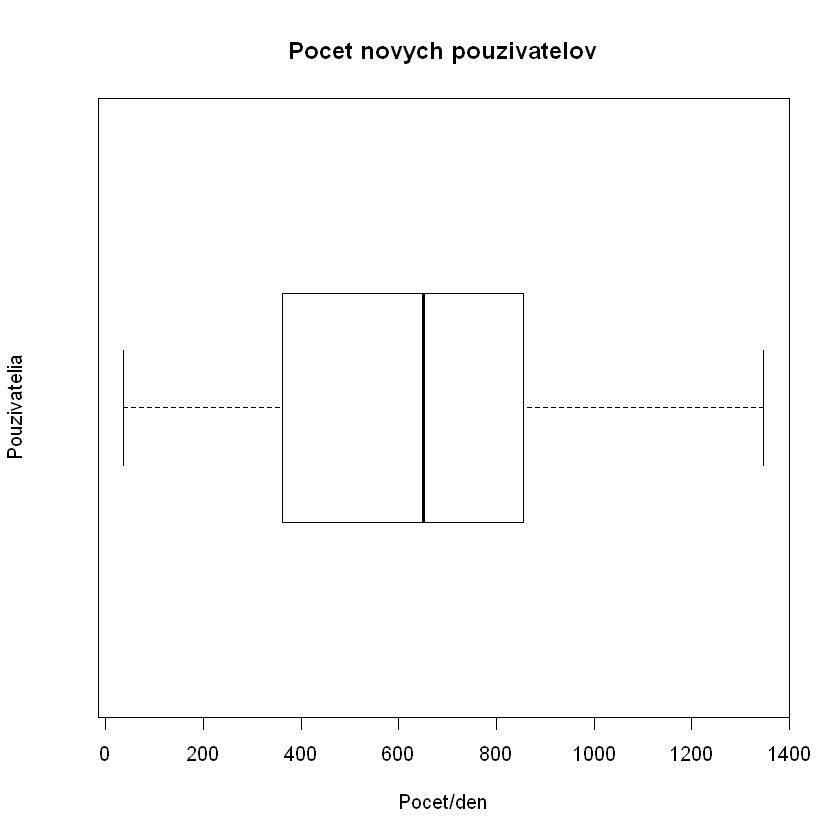

In [29]:
boxplot(dfb$new_users,
main = "Pocet novych pouzivatelov",
xlab = "Pocet/den",
ylab = "Pouzivatelia",
horizontal = TRUE
)

Boxplot pre max online

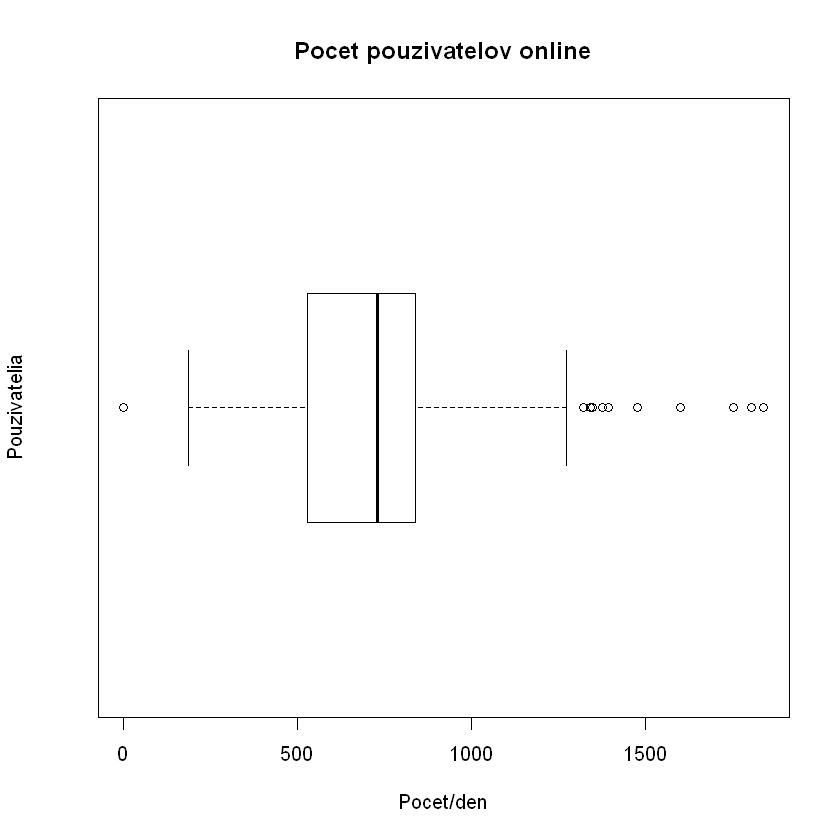

In [30]:
boxplot(dfb$max_online,
main = "Pocet pouzivatelov online",
xlab = "Pocet/den",
ylab = "Pouzivatelia",
horizontal = TRUE
)

Boxplot pre average online

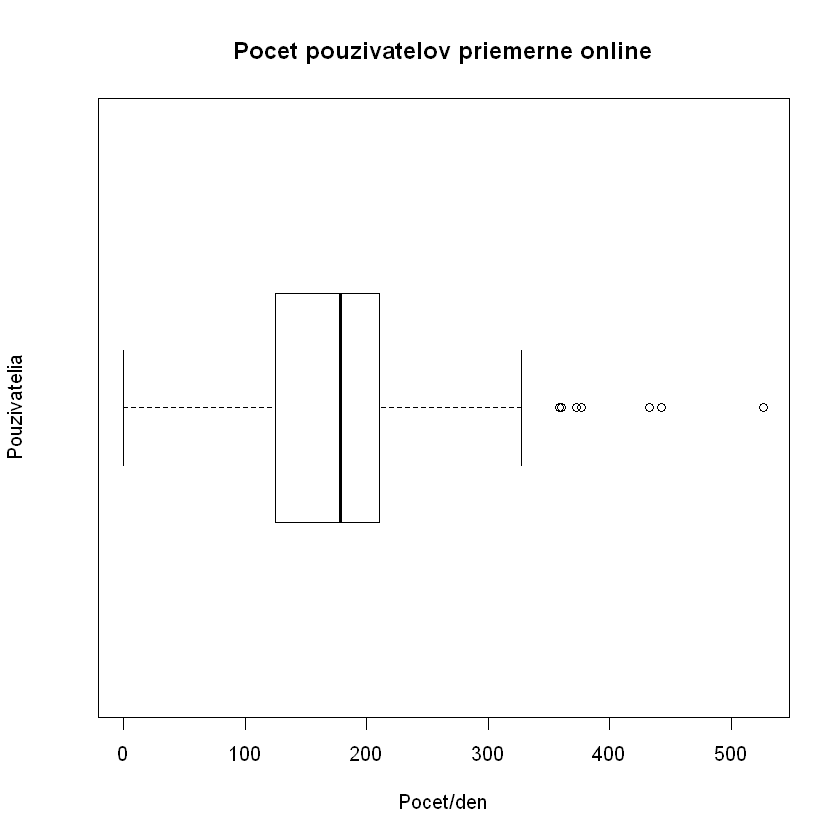

In [31]:
boxplot(dfb$average_online,
main = "Pocet pouzivatelov priemerne online",
xlab = "Pocet/den",
ylab = "Pouzivatelia",
horizontal = TRUE
)

Boxplot pre prenesenych dat (out)

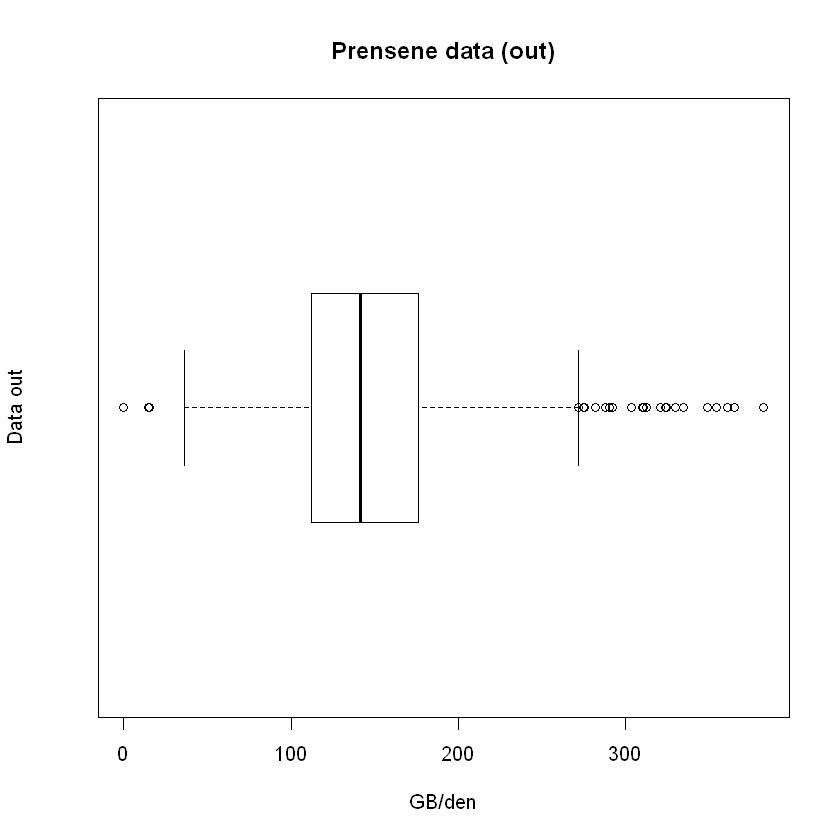

In [32]:
boxplot(dfb$data_out_GB,
main = "Prensene data (out)",
xlab = "GB/den",
ylab = "Data out",
horizontal = TRUE
)

Boxplot pre prenesenych dat (in)

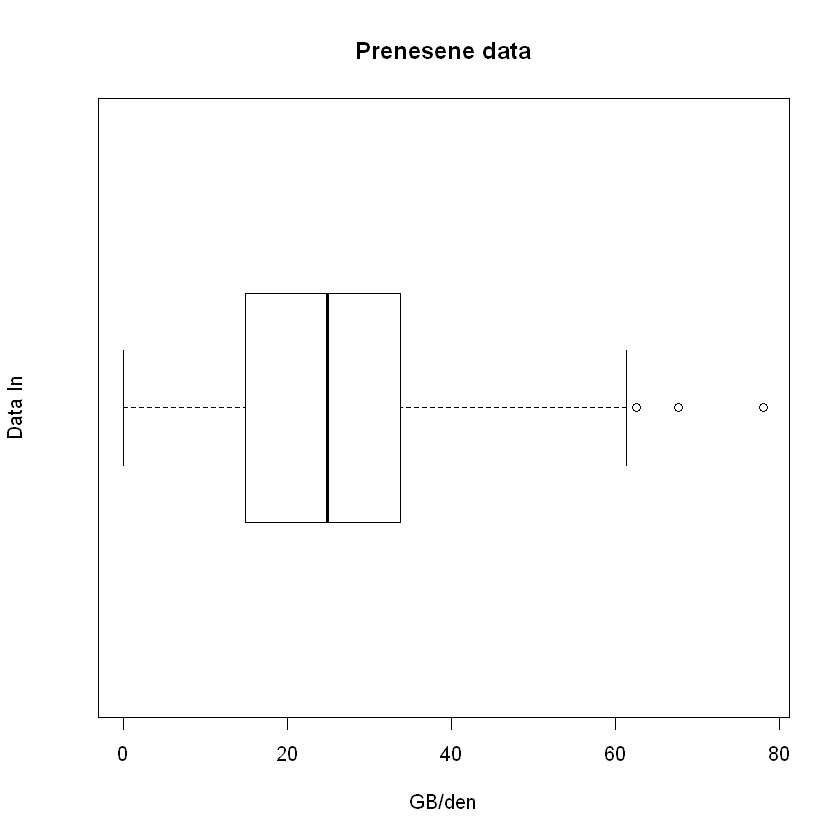

In [33]:
boxplot(dfb$data_in_GB,
main = "Prenesene data",
xlab = "GB/den",
ylab = "Data In",
horizontal = TRUE
)

Boxplot pre prenesenych dat (out)

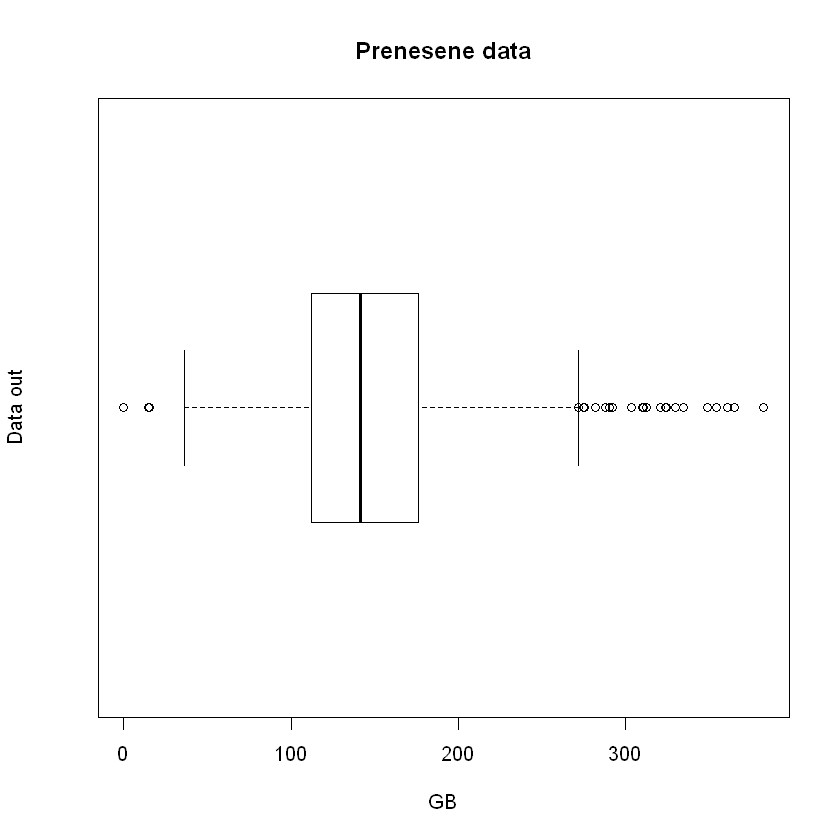

In [34]:
boxplot(dfb$data_out_GB,
main = "Prenesene data",
xlab = "GB",
ylab = "Data out",
horizontal = TRUE
)

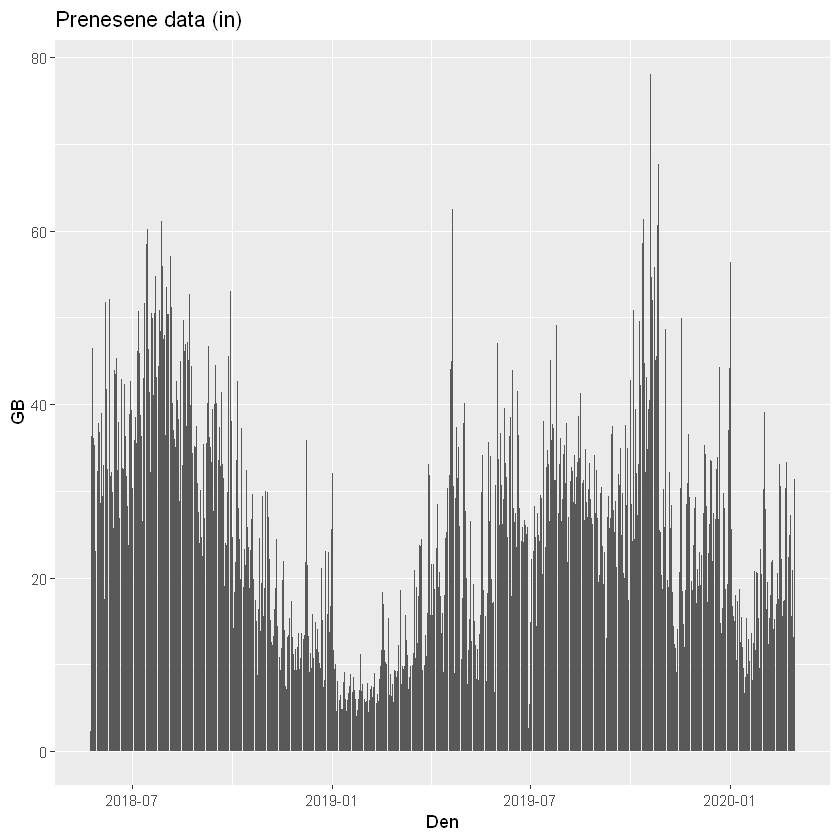

In [35]:
ggplot(dfb[which(dfb$data_in_GB > 0), ],aes(x=date,y=data_in_GB)) +
    geom_bar(stat="identity") +
    xlab("Den") +
    ylab("GB") +
    ggtitle("Prenesene data (in)")

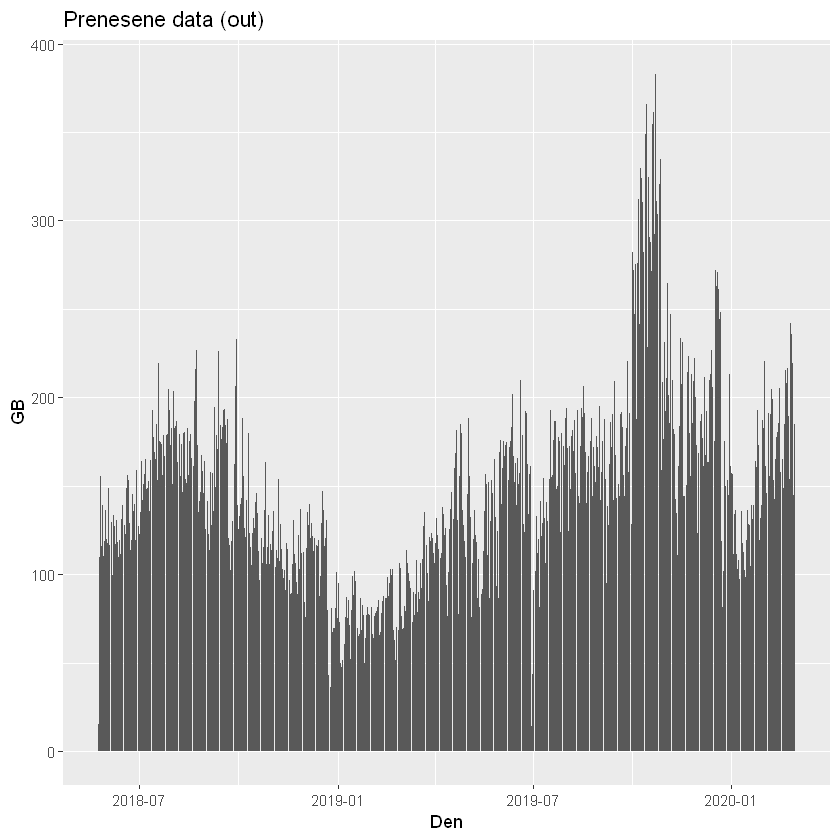

In [36]:
ggplot(dfb[which(dfb$data_out_GB > 0), ],aes(x=date,y=data_out_GB)) +
    geom_bar(stat="identity") +
    xlab("Den") +
    ylab("GB") +
    ggtitle("Prenesene data (out)")

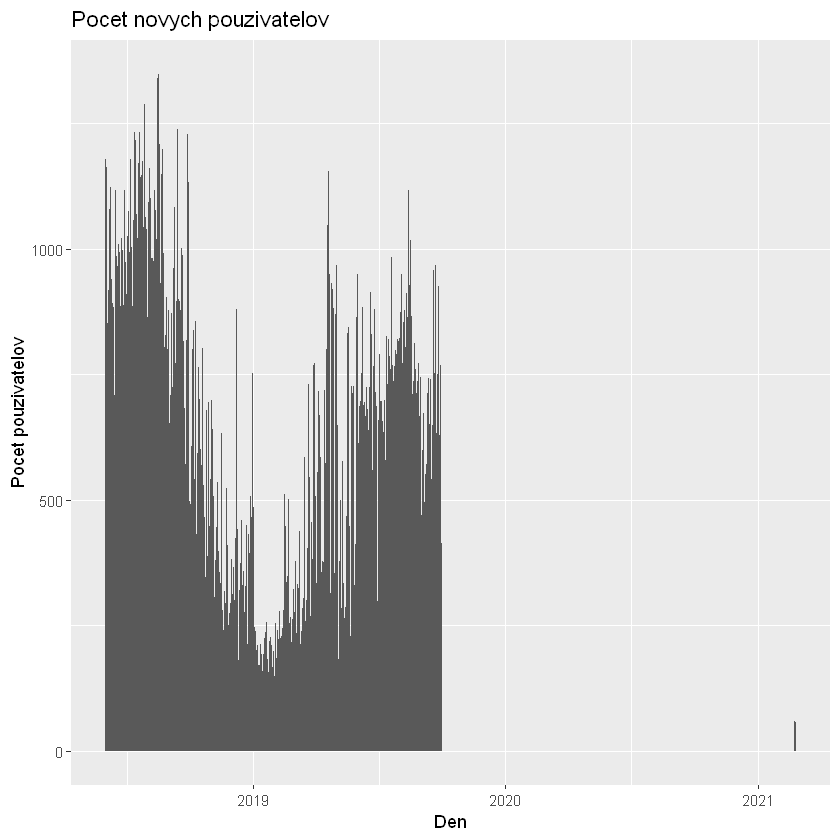

In [37]:
ggplot(dfb[which(dfb$new_users > 0), ],aes(x=date,y=new_users)) +
    geom_bar(stat="identity") +
    xlab("Den") +
    ylab("Pocet pouzivatelov") +
    ggtitle("Pocet novych pouzivatelov")

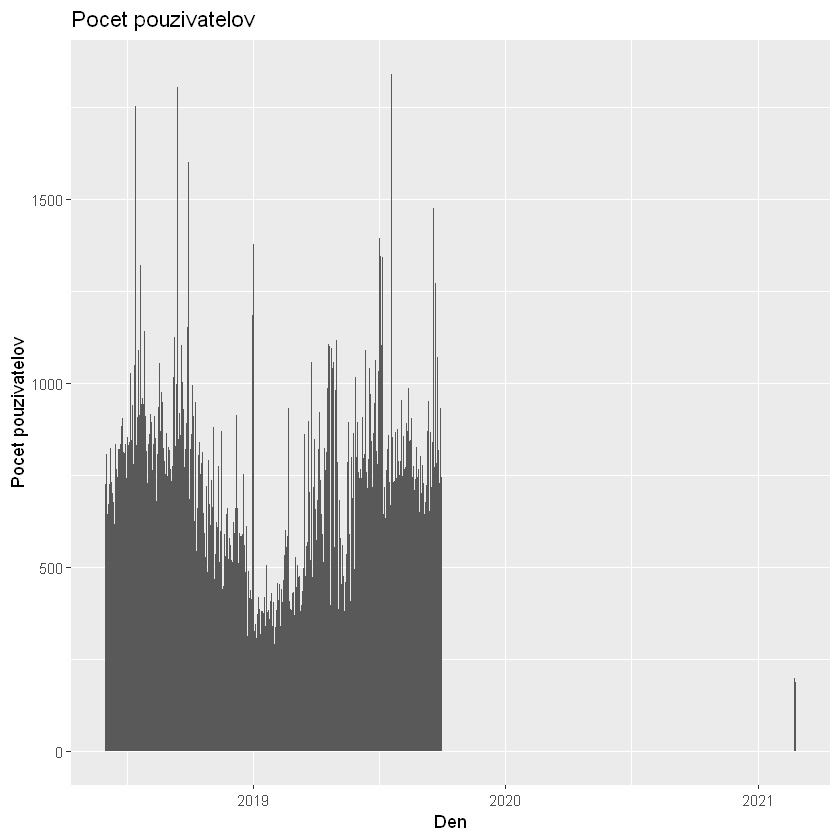

In [38]:
ggplot(dfb[which(dfb$max_online > 0), ],aes(x=date,y=max_online)) +
    geom_bar(stat="identity") +
    xlab("Den") +
    ylab("Pocet pouzivatelov") +
    ggtitle("Pocet pouzivatelov")

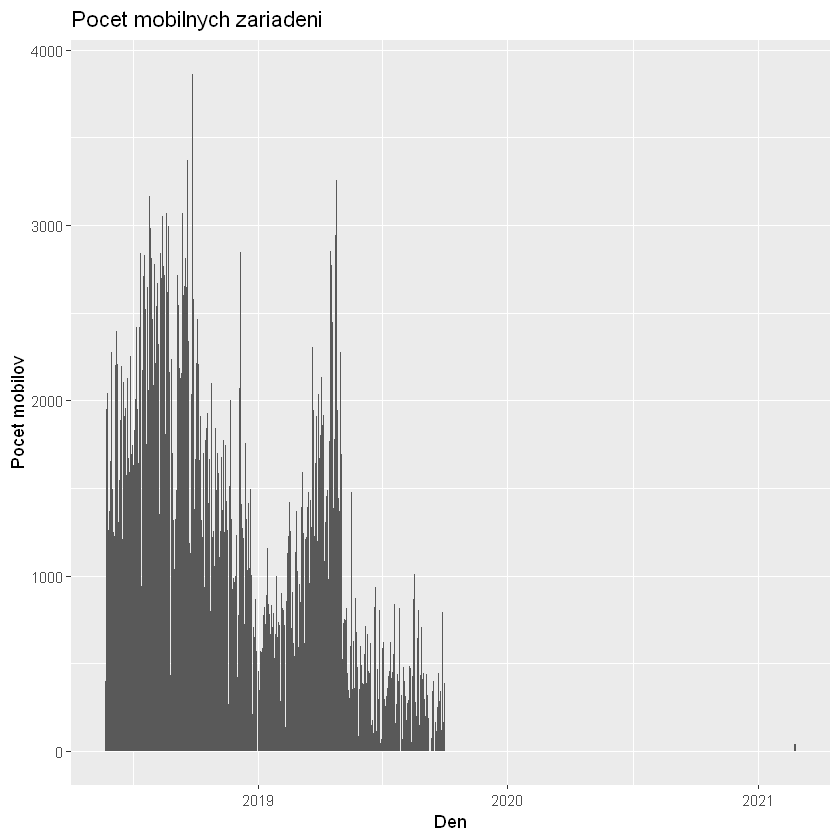

In [39]:
ggplot(dfb[which(dfb$device_type_mobile > 0), ],aes(x=date,y=device_type_mobile)) +
    geom_bar(stat="identity") +
    xlab("Den") +
    ylab("Pocet mobilov") +
    ggtitle("Pocet mobilnych zariadeni")